The aim of this Notebook is to compute numerically premium of contracts and risk measures of contracts in the Cramér-Lundberg model.

In [1]:
import os
import numpy as np
import scipy as scp
import pylab
import math
import matplotlib.pyplot as plt
%matplotlib inline
import numpy.random as rd
import scipy.stats as st
from scipy.stats import halfnorm
l=2     #Parameter lambda of the Poisson process
T=365   #Maturity of the contract

# Part 1 : The Poisson process

In [4]:
def Jump_Times_Poisson(lam,Te):
    # Write down a function that returns the jumps of a Poisson process with intensity lam on [0,Te]
    # 0 Should be an element of array tau even though 0 is not strictly speaking a jump time of N
    Ne = np.random.poisson(lam*Te)
    tau = np.sort(np.random.uniform(0,Te,Ne))
    if tau[0] != 0:
        tau = np.insert(tau, 0, 0)
    return tau

In [5]:
def plot_Poisson(lam,Te):
    tau=Jump_Times_Poisson(lam,Te)
    N=[0]
    for i in range(1,len(tau)):
        N.append(i)
    plt.step(tau,N,where='post')
    plt.plot(tau,N, 'C0o', alpha=0.5)

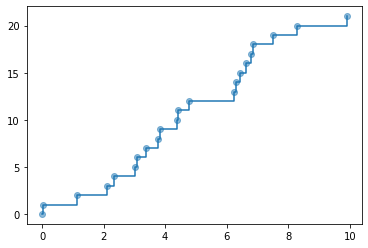

In [6]:
plot_Poisson(l,10)

We compute using the Monte-Carlo algorithm the quantity $\mathbb{E}[N_T]$

In [7]:
def ExpPoisson(lam,Te):
    M=3000
    e=0
    for i in range(0,M):
        e=e+len(Jump_Times_Poisson(lam,Te))-1
    e=e/M
    return e

In [8]:
print('Error=',ExpPoisson(2,10)-2*10)

Error= 0.12233333333333363


# Part II : Simulation and study of the claims

## 1) Small claims case

Half normal distribution

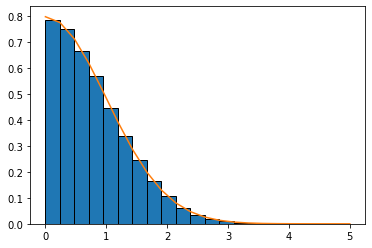

In [9]:
m=0
sig2=1
N=100000
G=st.halfnorm.rvs(m,np.sqrt(sig2),N)

n=10
pb=[]
c=[]
mi=0
ma=mi+5*sig2

for k in range(0,2*(n+1)):
    tk=mi+k*(ma-mi)/(2*n+1)
    c.append(tk)
    pb.append((np.sqrt(2)/np.sqrt(sig2*math.pi))*np.exp(-(tk)**2/(2*sig2)))    
fig=plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(G, bins=c, density=True, edgecolor='k')
ax.plot(c,pb, '-')
plt.show()

Lognormal distribution

/tmp/ipykernel_4423/3212836077.py:15: RuntimeWarning: divide by zero encountered in scalar divide
  pb.append( (1/(tk*np.sqrt(2*math.pi*sig2)))*np.exp(-((np.log(tk-m))**2)/(2*sig2)))
/tmp/ipykernel_4423/3212836077.py:15: RuntimeWarning: divide by zero encountered in log
  pb.append( (1/(tk*np.sqrt(2*math.pi*sig2)))*np.exp(-((np.log(tk-m))**2)/(2*sig2)))
/tmp/ipykernel_4423/3212836077.py:15: RuntimeWarning: invalid value encountered in scalar multiply
  pb.append( (1/(tk*np.sqrt(2*math.pi*sig2)))*np.exp(-((np.log(tk-m))**2)/(2*sig2)))


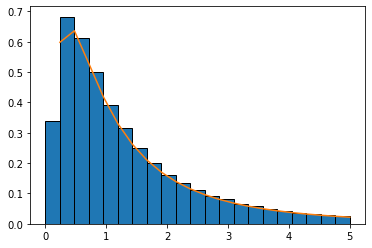

In [10]:
m=0
sig2=1
N=100000
G=np.random.lognormal(m,np.sqrt(sig2),N)

n=10
pb=[]
c=[]
mi=0
ma=mi+5*sig2

for k in range(0,2*(n+1)):
    tk=mi+k*(ma-mi)/(2*n+1)
    c.append(tk)
    pb.append( (1/(tk*np.sqrt(2*math.pi*sig2)))*np.exp(-((np.log(tk-m))**2)/(2*sig2)))
    
fig=plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(G, bins=c, density=True, edgecolor='k')
ax.plot(c,pb, '-')
plt.show()

A Discrete Random variables taking two values

In [11]:
m=0
sig2=1
N=100000
#G= complete here 


## 2) Large claims case

Weibull distribution

In [ ]:
m=0
sig2=1
N=100000
#G= Complete here 

n=10
pb=[]
c=[]
mi=0
ma=mi+5*sig2

for k in range(0,2*(n+1)):
    tk=mi+k*(ma-mi)/(2*n+1)
    c.append(tk)
  #  pb.append( Complete here )
    
fig=plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(G, bins=c, density=True, edgecolor='k')
ax.plot(c,pb, '-')
plt.show()

Pareto distribution

In [ ]:
m=0
sig2=1
N=100000
#G= Complete here 

n=10
pb=[]
c=[]
mi=0
ma=mi+5*sig2

for k in range(0,2*(n+1)):
    tk=mi+k*(ma-mi)/(2*n+1)
    c.append(tk)
  #  pb.append( Complete here )
    
fig=plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(G, bins=c, density=True, edgecolor='k')
ax.plot(c,pb, '-')
plt.show()

# Part III : Simulation of the risk process

## 1) Simulation 

#### A plot function

In [ ]:
# A plot function (p is a two dimensional array of points on a grid and their value)
def plot_Process(p):
        
    tk=[i[0] for i in p] # We recover the times
    vk=[i[1] for i in p] # We recover the values of R
    
    v0=[0 for i in p]
    Ok=[tk,v0]
 
    plt.plot(tk,vk)
    plt.plot(tk,v0)
    plt.show()

#### Simulation of the claims

In [ ]:
Np =100 # N is the number of points on [0,T]

In [ ]:
def claim(p,N):
    # N is the number of claims
    # p = 0 : Log normal
    # p = 1 : Bernouilli
    # p = 2 : Weibull
    # p= 3 : Pareto
    
    # Complete below
    
    if p==0:
        return np.random.lognormal(0,1,N)
    elif p==1:
        return 1

#### Simulation of the value $N_t$ given the jump times J (as simulated in "Jump_Times_Poisson")

In [ ]:
def N(t,Te,J):
    K=[]
    n=len(J)
    for j in range(0,n):
        K.append(J[j])
    if t==Te:
        return n-1
    K.append(Te)
    for i in range(0,n):
        if t >=K[i] and t <K[i+1]:
            return i

#### Simulation of the S process (given the jump times J and the claims C)

In [ ]:
def S(t,Te,J,C):
    K=[]
    D=[]
    n=len(J)
    
    for j in range(0,n):
        K.append(J[j])
        D.append(C[j])
    
    n=N(t,Te,K)
    r=0
    for i in range(0,n+1):
        r=r+D[i]
    return r

#### Simulation of the Risk process (returns the discretization of the path)

In [ ]:
def Rprocess(u,c,p,Te,lam):
    
    #Discretization grid without the jump times
    tk=[]
    for i in range(0,Np+1):
        tk.append(i*Te/Np)
    
    J=Jump_Times_Poisson(lam,Te) # We generate the jump times of the Poisson process
    
    temp=claim(p,len(J))
    C=[0]
    for k in range(0,len(J)):
        C.append(temp[k])
    
    for t in J:
        if t!=0:
            tk.append(t)
    
    tk.sort()
    
    pk=[]
    
    K=[]
    for t in J:
        K.append(t)
        
    L=[]
    for f in C:
        L.append(f)
    
    for t in tk:
        pk.append([t,u+c*t-S(t,Te,K,L)])
        
    return(pk)

In [ ]:
def Ruin(u,c,p,Te,lam):
    pk=Rprocess(u,c,p,Te,lam)
    tk=[i[0] for i in pk] # We recover the times
    
    plot_Process(pk)
    
    t=0 # Ruin time (if 0 then no ruin, else is the ruin time)
    
    for p in pk:
        if p[1]<0:
            t=p[0]
            return t
    return t

In [ ]:
t=Ruin(10,2,0,10,2)
if t==0:
    print('No ruin')
else:
    print('The ruin time is : ',t)

## 2) Cramér-Lundberg coefficient and ruin analysis

#### The small claims case

Study the condition studied during the lectures for insuring no ruin

#### The large claims case

Study the condition studied during the lectures for insuring no ruin

# Part IV : Risk measures

## 1) V@R

Write a function that computes the V@R of a Risk process

## 2) Beyond V@R

According to the lecture study other risk measures and compare them with V@R